The focus of this day is to learn the basic language of scientific computing, working with numpy arrays. Building all the low-level skills that we feel are necessary for interacting with real world problems.

-   Installing python libraries

-   Basic of working in Jupyter notebooks

-   Working with arrays of data (bulk of the day is this)

    -   Shapes of arrays + data types

    -   Performing mathematical operations (e.g. sin, multiply, divide, mean, stddev)

    -   Indexing and selecting data based on conditions (Very important!)

-   Very basic plotting

    -   Use as a tool for above

    -   Working with your data to select only the interesting data points

-   How to troubleshoot

    -   How to google your problems

        -   stackoverflow

    -   How to read error messages

-   Finish with simulating a random walk, plotting the trajectory
    -   Will use various numpy functions including random sampling
    -   Slightly more advanced plotting
    
<img src="images/2d_walk.png" width="75%">


# Working in Jupyter notebooks
- Tool bar on the left
- Markdown cells
    - How to make new lines
    - Writing math with $\LaTeX$: $i\hbar\frac{\partial}{\partial t}\left|\Psi(t)\right>=H\left|\Psi(t)\right>$
    - Images   
    
     <img src="images/2d_walk.png" width="40%">

- Select keyboard shortcuts
    - Indenting crtl-[ or crtl-]  
    - Shift tab
    - Cell commands 
    
    
### Useful resources:    
[Jupyterlab UI documentation (actually helpful!)](https://jupyterlab.readthedocs.io/en/stable/user/interface.html)  
[Jupyter shortcuts and other tips](https://yoursdata.net/jupyter-lab-shortcut-and-magic-functions-tips/)  
[LATEX Math for Undergrads](http://tug.ctan.org/info/undergradmath/undergradmath.pdf)

# Super basic plotting



In [2]:
import matplotlib.pyplot as plt

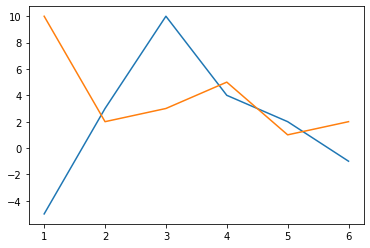

In [3]:
x = [1,2,3,4,5,6]
y1 = [-5,3,10,4,2,-1]
y2 = [10,2,3,5,1,2]
plt.plot(x,y1)#,color='tab:blue')

plt.plot(x,y2)

plt.show()

### Specifiying the colors, linestyles and labels


Specifying colors: https://matplotlib.org/tutorials/colors/colors.html  
Good reference: https://jakevdp.github.io/PythonDataScienceHandbook/04.01-simple-line-plots.html


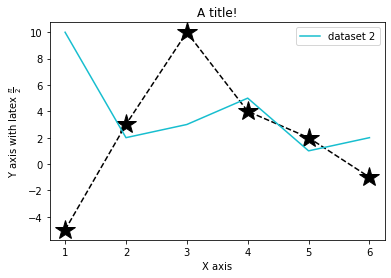

In [4]:
plt.plot(x,y1,'*--',color='black',markersize=20)

plt.plot(x,y2,color='tab:cyan',label='dataset 2')
plt.xlabel('X axis')
plt.ylabel(r'Y axis with latex $\frac{\pi}{2}$')
plt.title('A title!')
plt.legend() # if you don't run this then the legend won't appear
plt.show()

# Dealing with errors

1. Read the last line of the error
2. Copy the error description to google
    - Can help to add key terms like "matplotlib" or "python"

ValueError: x and y must have same first dimension, but have shapes (5,) and (4,)

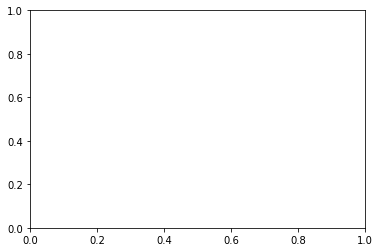

In [8]:
x = [3,4,5,6,7]
y1 = [3,4,2,34]
y2 = [5,3,5,6,8]
if y1[0] < 10:
    plt.plot(x,y1)
else:
    plt.plot(x,y2)

## Exercises - Fixing Errors

With a partner or small group fix the code in the next four cells so they all run without giving an error.  Feel free to google the error messages, but always think about what they mean first.

### Print out the last element of L

In [7]:
L = [3,4,16,23]
L[4]

IndexError: list index out of range

### For each value x in L print out $x^3 - 2\cdot(x-3)$

In [8]:
for x in L:
    print(x**3-2*(x-3)

SyntaxError: unexpected EOF while parsing (<ipython-input-8-d90c7192e221>, line 2)

### Using the pythag_triples list print confirm that the first triple is correct. I.e. show that $3^2 + 4^2 = 5^2$

Hint: Try break the math onto several lines to isolate the error

In [9]:
pythag_triples = [[3,4,5],[5,12,13],[7,24,25],[8,15,17]]
3**2 + pythag_triples[1]**2 == pythag_triples[2]**2

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

### plot y as a function of x

This will give one of the most common matplotlib errors

ValueError: x and y must have same first dimension, but have shapes (5,) and (6,)

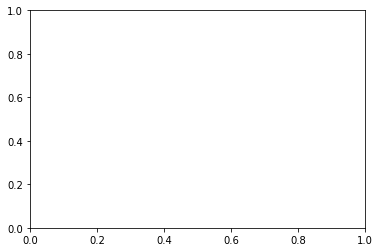

In [12]:
x = [1, 2, 3, 4,5]
y = [20,4,5,6,7,8]
plt.plot(x,y)
plt.show()

# Numpy

### What are NumPy Arrays

Basically multidimensional lists. Very fast for doing math!


In [9]:
import numpy as np
from math import sin

In [10]:
N =1000000

arr_list = list(range(N))

In [11]:
%%timeit
for i in range(len(arr_list)):
    sin(arr_list[i])

91.3 ms ± 1.55 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:

arr_np = np.arange(N)


In [13]:
%%timeit
np.sin(arr_np)


12 ms ± 190 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)



# How to create arrays

**From a list**: we can just call np.array(list) to turn that list into a numpy array. But be careful the lists need to be shaped like a valid matrix.


In [14]:
good_list = [[ 1., 2., 3.],
            [ 4., 5.,6. ]]

bad_list = [[ 1., 2., 3.],
            [ 4., 5.]]

print(good_list)
print(bad_list)

[[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]]
[[1.0, 2.0, 3.0], [4.0, 5.0]]


In [15]:
arr = np.array(good_list)
bad_arr = np.array(bad_list)

print(arr)
print('---')
print(bad_arr)

[[1. 2. 3.]
 [4. 5. 6.]]
---
[list([1.0, 2.0, 3.0]) list([4.0, 5.0])]


See the problem using `.shape` or `.dtype`

In [16]:
arr.dtype

dtype('float64')

In [14]:
bad_arr.dtype

dtype('O')

### The fix

only pass rectangular arrays of numbers to numpy.

In [17]:
arr.shape

(2, 3)

In [18]:
bad_arr.shape

(2,)

## Doing math

There are many mathematical functions availiable to perform on arrays: https://docs.scipy.org/doc/numpy/reference/ufuncs.html#math-operations

For this we will use np.[linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) to generate arrays of evenly spaced numbers.


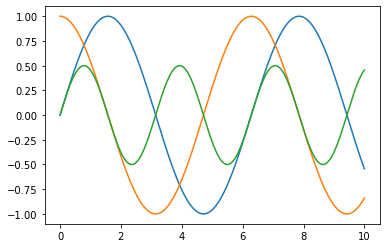

In [24]:
x = np.linspace(0,10,num=1000)
x2 = np.linspace(0,10,num=1000)

plt.plot(x,np.sin(x))
plt.plot(x2,np.cos(x2))

multiplied = np.sin(x)*np.cos(x2)
plt.plot(x,multiplied)

# Plotting math exercises

### 1.
plot the function:
$$y = \sin(x) - \cos(5\cdot log_2(x))$$
from $x=1$ and $x=40$

At the end your plot should look like this:
 
<img src='images/math_1.png' width=50%>

Hint: If yours doesn't look as a smooth as my plot try `plt.plot(x,y,'o-')` to figure out why.


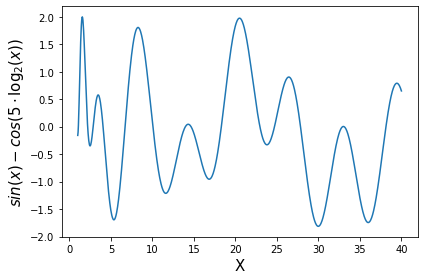

In [37]:
x = np.linspace(1,40,num=1000)
y = np.sin(x)-np.cos(5*np.log2(x))
plt.plot(x,y,)

plt.tight_layout()
plt.xlabel('X',fontsize=15)
plt.ylabel(r'$sin(x) - cos(5\cdot \log_2(x))$',fontsize=15)
plt.tight_layout()
plt.savefig('images/math_1.png')

### 2.
Plot  $ y(t) = e^{-at}$ for $t \in [0,10]$ for these values of $a$: [1,5,10]

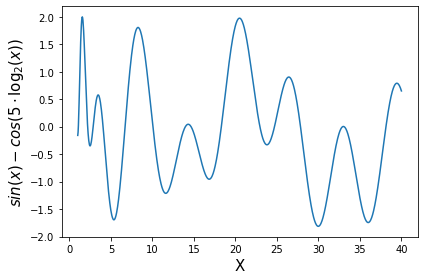

In [119]:
x = np.linspace(1,40,num=1000)
y = np.sin(x)-np.cos(5*np.log2(x))
plt.plot(x,y,)

plt.tight_layout()
plt.xlabel('X',fontsize=15)
plt.ylabel(r'$sin(x) - cos(5\cdot \log_2(x))$',fontsize=15)
plt.tight_layout()
plt.savefig('images/math_2.png')

###  3.
Plot a the first, fifth and tenth order Bessel functions of the first kind on the same plot from $x = 0$ to $x = 20$


<img src='images/math_3.png' width=40%>


Hint: Google, or look at [scipy.special](https://docs.scipy.org/doc/scipy/reference/special.html)

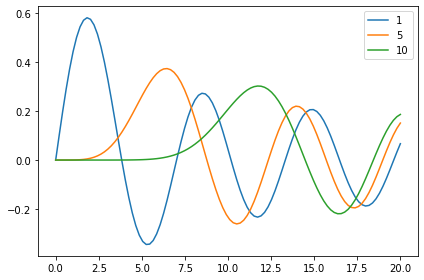

In [120]:
from scipy.special import jv

x = np.linspace(0,20,100)
for a in [1,5,10]:
    plt.plot(x,jv(a,x),label=a)
plt.legend()
plt.tight_layout()
plt.savefig('images/math_3.png')

### 4.
Plot a normalized gaussian (aka normal) distribution with mean ($\mu$) $=25$ and standard deviation ($\sigma$) $=2.5$. The normalization here means that it should be a valid probability distribution, i.e. the area under the curve is $1$.

<img src='images/math_4.png' width=40%>

Hint: Try googling "how to plot normalized 1d gaussian python"

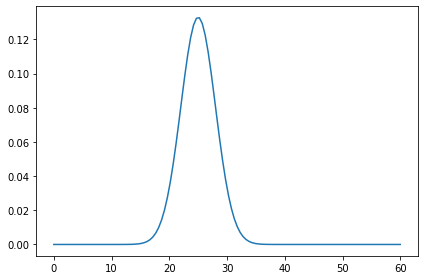

In [121]:

def gaussian(x, mu, sig):
    return 1./(np.sqrt(2.*np.pi)*sig)*np.exp(-np.power((x - mu)/sig, 2.)/2)

x_values = np.linspace(0, 60, 120)
mu = 25
sigma = 2
plt.plot(x_values, gaussian(x_values, mu, sig))
plt.tight_layout()
plt.savefig('images/math_4.png')
plt.show()

### 5.

Let's do a very basic fit to some data. In the below cell I load two data sets for you. Figure out their means and standard deviations and use these to plot the gaussian that best matches the data. To plot this data you will need to make a histogram. I've plotted the first dataset for you. Feel free to play around with the arguments to see what they do

Hint: Try googling: "get mean and std numpy"

Don't worry about the fit to data2! We'll do a better job when we learn about indexing

In [147]:
arr = np.random.randn(10000)+5
np.save('data1',arr)
arr = np.concatenate([np.random.randn(5000)*2+9,np.random.randn(5000)*.5+2])
np.save('data2.npy',arr)
data1 = np.load('data1.npy')
data2 = np.load('data2.npy')

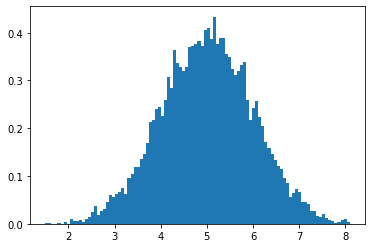

In [151]:
data1 = np.load('data1.npy')
data2 = np.load('data2.npy')

plt.hist(data1,density=True,bins=100)
plt.show()

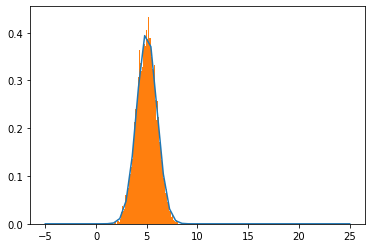

In [149]:
μ = np.mean(data1)
σ = np.std(data1)

plt.plot(x,gaussian(x,μ,σ))
plt.hist(data1,bins=100,density=True)
plt.show()

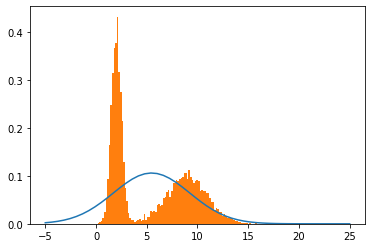

In [150]:
x = np.linspace(-5,25)

μ = np.mean(data2)
σ = np.std(data2)

plt.plot(x,gaussian(x,μ,σ))
plt.hist(data2,bins=100,density=True)
plt.savefig('images/math')
plt.show()

## More creating arrays

We can also make arrays from scratch rather than starting with a list. The most useful funcitons can be broken down into two main classes and are:

- Methods giving you specific numbers
    - [arange](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html#numpy.arange) Use this to generate lists of integers
    - [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) use this to generate lists of evenly spaced numbers. For example to evaluate a function at many values between 0 and 1
    
- Methods where you give the shape of an array
    - [zeros](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros) give an array of zeros in the shape you specify
    - [zeros_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros_like.html#numpy.zeros_like) gives an array of zeros in the shape of anther array
    - [ones](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones) same as zeros except filled with ones
    - [ones_like](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ones_like.html#numpy.ones_like) sames as zeros_like except filled with ones


### Shape and Reshaping

Arrays have a property called shape that is a generalization to many dimensions of the length of a list.


Calls each dimension an axis


<img src="https://i.stack.imgur.com/gj5ue.jpg" >


image from: https://stackoverflow.com/a/52491249/835607

In [105]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

In [106]:
arr = np.arange(6).reshape(2,3)
arr

array([[0, 1, 2],
       [3, 4, 5]])

In [108]:
arr.ravel()

array([0, 1, 2, 3, 4, 5])

In [109]:
arr.flatten()

array([0, 1, 2, 3, 4, 5])

In [116]:
arr = np.arange(6).reshape(2,3)
print(arr)


[[0 1 2]
 [3 4 5]]


In [119]:
flattened = arr.flatten()
flattened += 3
print(arr)

[[3 4 5]
 [6 7 8]]


In [120]:

ravelled = arr.ravel()
ravelled += 3
print(arr)


[[ 6  7  8]
 [ 9 10 11]]


## Broadcasting

In [123]:
a = np.array([[1,1],
              [2,2],
              [3,3]])

a * 5

array([[ 5,  5],
       [10, 10],
       [15, 15]])

In [125]:

b = np.array([2,3])
a*b

array([[2, 3],
       [4, 6],
       [6, 9]])

In [126]:
b = np.arange(6).reshape(a.shape)
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [127]:
a*b

array([[ 0,  1],
       [ 4,  6],
       [12, 15]])

Given the below array 

## Indexing

### Make a histogram of the all the values in data1 and data2. Let's make this a valid probability distribution by making the area sum to 1, i.e. make a normalized hisogram
Hint 1: To combine the arrays google: Combine 1D array numpy  
Hint 2: To figure out how to plot a histogram try googling: Plot normalized histogram matplotlib  
Hint 3: Play with the `bins` argument to the histogram, for this data I like `bins=100`



In [61]:
data1 = np.random.randn(1000)
data2 = np.random.randn(500)+10

In [62]:
combined = np.hstack([data1,data2]).reshape(100,15) 




([array([ 4., 35., 27.,  1.,  0.,  0.,  2., 10., 21.,  0.]),
  array([ 1., 33., 25.,  8.,  0.,  0.,  2., 12., 18.,  1.]),
  array([ 5., 33., 28.,  1.,  0.,  0.,  2., 15., 16.,  0.]),
  array([ 2., 34., 27.,  4.,  0.,  0.,  2., 10., 19.,  2.]),
  array([ 1., 35., 27.,  4.,  0.,  0.,  1., 10., 18.,  4.]),
  array([ 5., 19., 37.,  6.,  0.,  0.,  0.,  8., 23.,  2.]),
  array([ 3., 36., 24.,  4.,  0.,  0.,  0., 11., 16.,  6.]),
  array([ 3., 30., 29.,  5.,  0.,  0.,  0.,  9., 18.,  6.]),
  array([ 1., 28., 34.,  4.,  0.,  0.,  0., 15., 13.,  5.]),
  array([ 3., 35., 26.,  3.,  0.,  0.,  2., 11., 18.,  2.]),
  array([ 4., 34., 27.,  1.,  0.,  0.,  2.,  6., 23.,  3.]),
  array([ 4., 28., 30.,  3.,  1.,  0.,  1., 10., 18.,  5.]),
  array([ 6., 29., 29.,  2.,  0.,  0.,  1., 10., 15.,  8.]),
  array([ 2., 35., 25.,  4.,  0.,  0.,  0., 11., 18.,  5.]),
  array([ 1., 33., 29.,  3.,  0.,  0.,  2., 12., 17.,  3.])],
 array([-3.18231   , -1.57851615,  0.0252777 ,  1.62907156,  3.23286541,
         4.

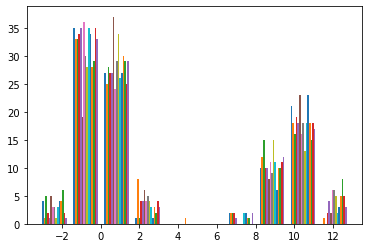

In [63]:

plt.hist(combined.reshape(100,15))


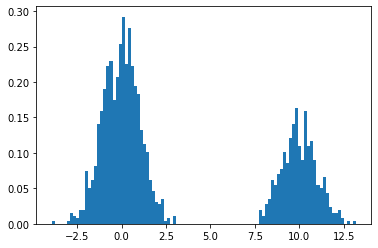

In [48]:
plt.hist(combined,bins=100,density=True)
plt.show()

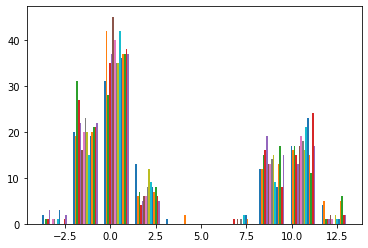

In [60]:
plt.show()

In [51]:
np.savetxt('data3.csv',combined.reshape(500,3),delimiter=',')

In [152]:
arr = np.loadtxt('out.csv',delimiter=',')

In [153]:
arr

array([[-0.51815797, -0.42354991, -0.23252511],
       [ 0.50944049, -0.56243903, -0.45765859],
       [ 0.11920649, -2.07954357,  2.55966988],
       ...,
       [10.14871601, 10.31101184,  9.11665303],
       [10.15947896,  9.79650312, 10.41548026],
       [ 8.57552708, 12.09303928,  9.23878521]])

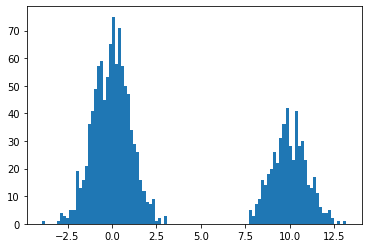

In [56]:
plt.hist(combined.ravel(),bins=100)
plt.show()

## Indexing

Where two arrays match up multiply them

In [ ]:
np.linspace()

In [ ]:
light_spectrum = 
detector_efficieny = 

In [25]:
x1 =np.linspace(0,100,500)

In [26]:
x2 = np.linspace(0,100,1000)

In [29]:
data1 = np.sin(x1)

data2 = np.cos(x2)

In [30]:
data1*data2

ValueError: operands could not be broadcast together with shapes (500,) (1000,) 

In [3]:
np.array([0,1.,3])==1

array([False,  True, False])

Now find the minimum value of function

Using argsort and indexing find 

Try to use the & operator to combine numpy boolean array

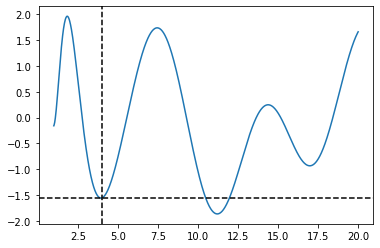

In [4]:
num_points = 1000
x = np.linspace(1,20,num=num_points)#+(np.random.randn(num_points)*.05)
y = np.sin(x)-np.cos(5*np.log(x))
plt.plot(x,y)
# y = np.sin(x)-np.log(x)
# plt.plot(x,y)

x_idx = (x<6) & (x>4)
idx = np.argmin(y[x_idx])

plt.axvline(x[x_idx][idx],color='k',linestyle='--')
plt.axhline(y[x_idx][idx],color='k',linestyle='--')

# Application Random Walks

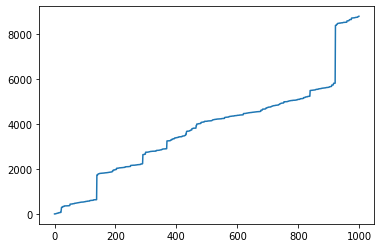

In [7]:
arr = np.random.pareto(.99,size=1000)
positions = np.cumsum(arr)
plt.plot(positions)

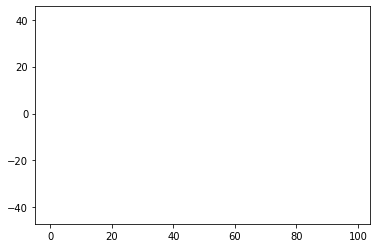

In [8]:
num_time_steps = 100
num_walkers = 10000
arr = np.random.randn(num_time_steps,num_walkers)
walked = arr.cumsum(axis=0)
plt.plot(walked,alpha=.0001,color='k')
plt.show()

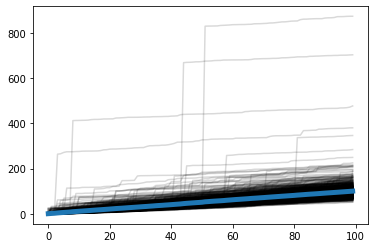

In [9]:
num_time_steps = 100
num_walkers = 1000
arr = np.random.pareto(2,num_time_steps*num_walkers).reshape(num_time_steps,num_walkers)
walked = arr.cumsum(axis=0)
plt.plot(walked,alpha=.15,color='k')
plt.plot(np.mean(walked,axis=1),linewidth=5)
plt.show()

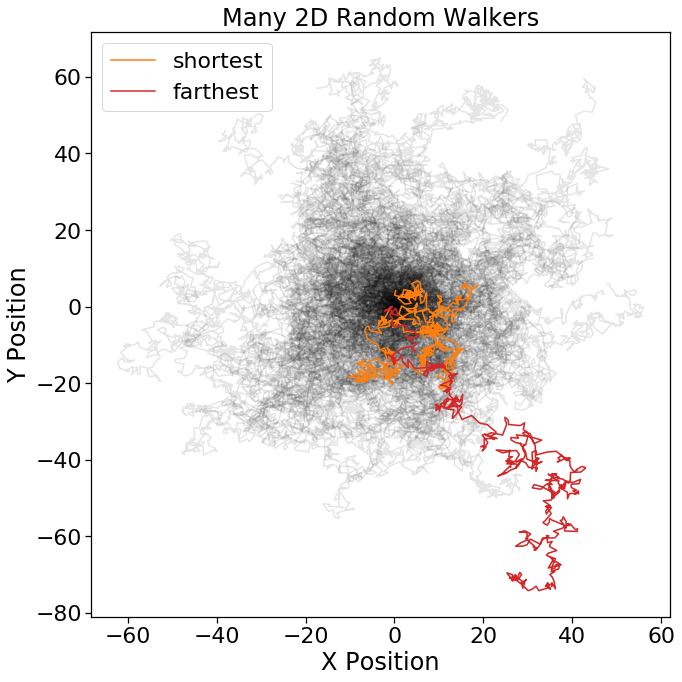

In [15]:
plt.figure(figsize=(10,10))
num_time_steps = 500
num_walkers = 100
arr = np.random.randn(num_time_steps,num_walkers,2)
walkers = arr.cumsum(axis=0) # has shape [time, walker, x/y]
plt.plot(walkers[:,:,0],walkers[:,:,1],alpha=.1,color='k')


distances = np.sum(np.sqrt(walkers[-1,:,:]**2),axis=1)
sorted_order = np.argsort(distances)

#find farthest walker
farthest = walkers[:,sorted_order[-1],:]
#find shortest

shortest = walkers[:,sorted_order[0],:]

plt.plot(shortest[:,0],shortest[:,1],alpha=1,color='tab:orange',label='shortest')
plt.plot(farthest[:,0],farthest[:,1],alpha=1,color='tab:red',label='farthest')
plt.legend()
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Many 2D Random Walkers')
plt.tight_layout()
plt.savefig('images/2d_walk.png',dpi=100)

In [ ]:
num_time_steps = 100
num_walkers = 100
arr = np.random.pareto(2,2*num_time_steps*num_walkers).reshape(num_time_steps,num_walkers,2)
walked = arr.cumsum(axis=0)
plt.plot(walked[:,:,0],walked[:,:,1],alpha=.1,color='k')
plt.plot(walked[:,0,0],walked[:,0,1],alpha=1,color='r')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

In [ ]:
fig, ax = plt.subplots()


lines = plt.plot(walkers[:,:,0],walkers[:,:,1],alpha=.1,color='k')


distances = np.sum(np.sqrt(walkers[-1,:,:]**2),axis=1)
sorted_order = np.argsort(distances)

#find farthest walker
farthest = walkers[:,sorted_order[-1],:]
#find shortest

shortest = walkers[:,sorted_order[0],:]

short_line = plt.plot(shortest[:,0],shortest[:,1],alpha=1,color='tab:orange',label='shortest')[0]
far_line = plt.plot(farthest[:,0],farthest[:,1],alpha=1,color='tab:red',label='farthest')[0]

def animate(frame):
    for walker,line in enumerate(lines):
        line.set_data(walkers[:frame,walker, 0],walkers[:frame,walker,1])
    far_line.set_data(farthest[:frame,0],farthest[:frame,1])
    short_line.set_data(shortest[:frame,0],shortest[:frame,1])
    return lines
plt.legend()
# plt.plot(shortest[:,0],shortest[:,1],alpha=1,color='tab:orange',label='shortest')
# plt.plot(farthest[:,0],farthest[:,1],alpha=1,color='tab:red',label='farthest')
# plt.legend()
# plt.show()


In [ ]:
anim = animation.FuncAnimation(fig, animate, 
                               frames=num_time_steps, interval=50, 
                               blit=True)

In [ ]:
anim.save('out.mp4',dpi=200)

In [ ]:
HTML(anim.to_html5_video())

# Debugging Checklist:

1. Is there an error?  
    1a. Read the error and the line of code where the problem happened  
    1b. Google the error
2. Is the result not what you expect?  
    2a. Go through step by step, printing out variables, to see where the problem arises
    
3. Ask a friend to look at it
4. Ask a question on stackoverflow
    - Make sure you ask the question effectively! Follow these guidelines: https://stackoverflow.com/help/minimal-reproducible-example